In [61]:
import numpy as np
from scipy import special
from tensorflow import keras
from matplotlib import pyplot as plt

In [150]:
class NeuralNetwork:
    def __init__(self, inodes, hnodes, onodes, learning_grade):
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes
        self.learning_grade = learning_grade
        
        self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5
        self.who = np.random.rand(self.onodes, self.hnodes) - 0.5
        
        self.active_func = lambda x:special.expit(x)
        self.inverse_active_func = lambda x:special.logit(x)
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.active_func(hidden_inputs)
        out_inputs = np.dot(self.who, hidden_outputs)
        out_outputs = self.active_func(out_inputs)
        
        out_errors = targets - out_outputs
        hidden_errors = np.dot(self.who.T, out_errors)
        self.who += self.learning_grade * np.dot(out_errors * out_outputs * (1 - out_outputs), hidden_outputs.T)
        self.wih += self.learning_grade * np.dot(hidden_errors * hidden_outputs * (1 - hidden_outputs), inputs.T)
    
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.active_func(hidden_inputs)
        out_inputs = np.dot(self.who, hidden_outputs)
        out_outputs = self.active_func(out_inputs)
        
        return out_outputs
    
    def back_query_I(self, targets_list):
        out_outputs = np.array(targets_list, ndmin=2).T
        out_inputs = self.inverse_active_func(out_outputs)
        hidden_outputs = np.dot(self.who.I, out_inputs)
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        hidden_inputs = self.inverse_active_func(hidden_outputs)
        inputs = np.dot(self.wih.I, hidden_inputs)
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs
        
    def back_query_T(self, targets_list):
        out_outputs = np.array(targets_list, ndmin=2).T
        out_inputs = self.inverse_active_func(out_outputs)
        hidden_outputs = np.dot(self.who.T, out_inputs)
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        hidden_inputs = self.inverse_active_func(hidden_outputs)
        inputs = np.dot(self.wih.T, hidden_inputs)
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs
        

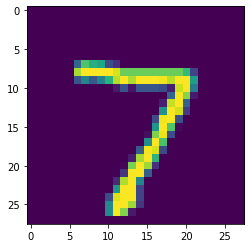

In [146]:
data_file = open("mnist_datasets/mnist_test_10.csv")
data_list = data_file.readlines()
data_file.close()
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array)

In [152]:
n = NeuralNetwork(784, 100, 10, 0.3)

In [171]:
data_file = open("mnist_datasets/mnist_train.csv")
data_list = data_file.readlines()
data_file.close()

for data in data_list:
    all_values = data.split(',')
    inputs_list = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets_list = np.zeros(10) + 0.01
    targets_list[int(all_values[0])] = 0.99
    n.train(inputs_list, targets_list)

In [172]:
test_file = open("mnist_datasets/mnist_test.csv")
test_list = test_file.readlines()
test_file.close()

score = []
for test in test_list:
    all_values = test.split(',')
    correct_label = int(all_values[0])
    inputs_list = (np.asfarray(all_values[1:])) / 255.0 * 0.99 + 0.01
    outputs = n.query(inputs_list)
    label = np.argmax(outputs)
    if (label == correct_label):
        score.append(1)
    else:
        score.append(0)

score_array = np.asarray(score)
print("correct:", score_array.sum() / score_array.size)

correct: 0.9445


[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[9.18740342e-04]
 [3.96872135e-03]
 [8.92207317e-04]
 [8.71430078e-04]
 [9.83831548e-01]
 [1.11858523e-03]
 [1.69781649e-02]
 [4.75067476e-03]
 [6.18186579e-04]
 [1.21100280e-01]]


[0.0009187403420069477,
 0.003968721348455938,
 0.000892207316898897,
 0.0008714300780116578,
 0.9838315483457869,
 0.0011185852265075962,
 0.016978164859116966,
 0.004750674756506107,
 0.0006181865790393133,
 0.12110027990185875]

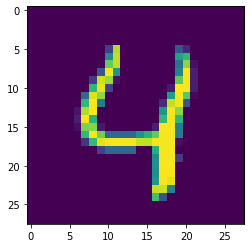

In [200]:
test_file = open("mnist_datasets/mnist_test_10.csv")
test_list = test_file.readlines()
test_file.close()

all_values = test_list[4].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array)

inputs_list = (np.asfarray(all_values[1:])) / 255.0 * 0.99 + 0.01
aaa = n.query(inputs_list)
print(np.around(aaa).astype(np.int32))
print(aaa)
aaa.T.reshape((10)).tolist()

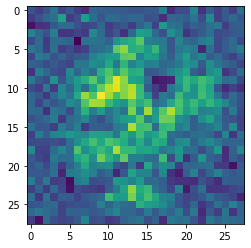

In [212]:
label = 8
targets_list = np.zeros(10) + 0.01
targets_list[label] = 0.99
a = n.back_query_T(targets_list)
plt.imshow(a.reshape((28, 28)))
plt.show()

In [ ]:
这是